**Testing Dark Image Against Bright Image: Dark image left-side, Brighter image right-side**

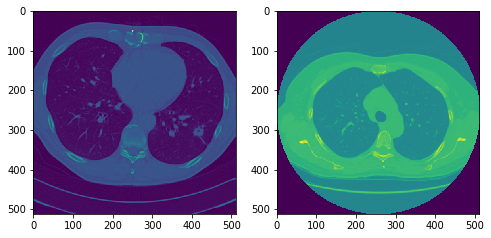

In [1]:
# envo dependencies: matplotlib, pillow, scikit-image, numpy
%matplotlib inline
from matplotlib.pyplot import imread, imshow, subplots, show
import matplotlib.pyplot as plt

image = imread("./dark images/LIDC-IDRI-1007_image_000010.png")
image2 = imread("./brighter images/LIDC-IDRI-0002_image_000012.png")
images = [image, image2]

def plot_me(images, opt=None):
    w=10
    h=10
    fig=plt.figure(figsize=(8, 8))
    columns = 2
    rows = 1
    for i in range(1, columns*rows +1):
        fig.add_subplot(rows, columns, i)
        plt.imshow(images[i-1])
    plt.show()
    show()
    
plot_me(images)

**Originals, however left-side appears much more visible here than in typical image viewer where it looks to be completely black.**

**Image Effects**

In [2]:
from skimage import data, img_as_float
from skimage import exposure
import numpy as np
#%matplotlib inline
#import matplotlib.pyplot as plt

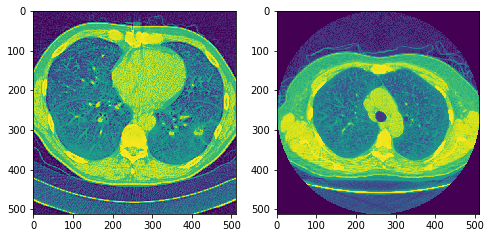

In [3]:
# Histogram Equalization

images = [exposure.equalize_hist(image), \
          exposure.equalize_hist(image2)]

plot_me(images)
#imgplot = plt.imshow(img_eq)

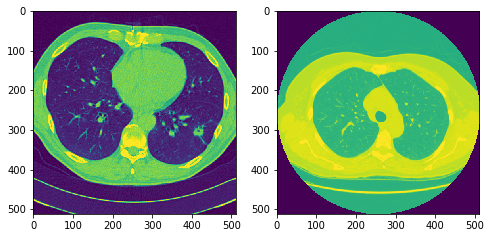

In [4]:
# Contrast stretching

p2, p98 = np.percentile(image, (2, 98))
p2_2, p98_2 = np.percentile(image2, (2, 98))

images = [exposure.rescale_intensity(image, in_range=(p2, p98)), \
          exposure.rescale_intensity(image2, in_range=(p2_2, p98_2))]

plot_me(images)
#imgplot = plt.imshow(img_rescale)

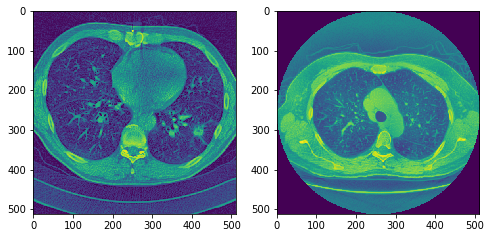

In [5]:
# Adaptive Equalization

images = [exposure.equalize_adapthist(image, clip_limit=0.03), \
          exposure.equalize_adapthist(image2, clip_limit=0.03)]

plot_me(images)
#imgplot = plt.imshow(img_adapteq)

**Edge Enhancement**

In [6]:
from PIL import Image
from PIL import ImageOps
from PIL import ImageFilter  

img = Image.open("./dark images/LIDC-IDRI-1007_image_000010.png")
img2 = Image.open("./brighter images/LIDC-IDRI-0002_image_000012.png")

# convoluted process to get RGB
rgbimg = Image.new("RGB", img.size)
rgbimg.paste(img)
rgbimg.save('temp.png')
img = Image.open("temp.png")

# convoluted process to get RGB
rgbimg2 = Image.new("RGB", img2.size)
rgbimg2.paste(img2)
rgbimg2.save('temp2.png')
img2 = Image.open("temp2.png")

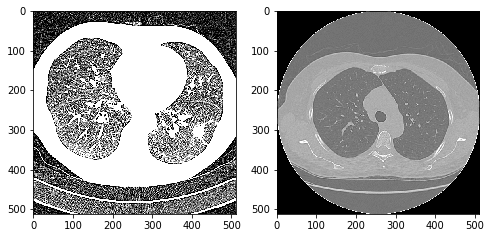

In [7]:
# Apply edge enhancement filter

images = [img.filter(ImageFilter.EDGE_ENHANCE), img2.filter(ImageFilter.EDGE_ENHANCE)]

plot_me(images)

#edgeEnahnced = img.filter(ImageFilter.EDGE_ENHANCE)
#imgplot = plt.imshow(edgeEnahnced)

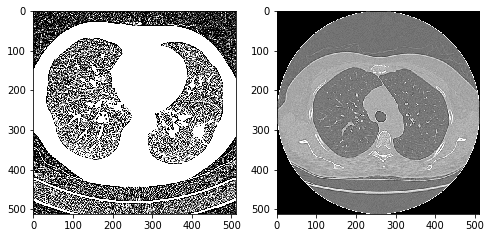

In [8]:
# Apply increased edge enhancement filter

images = [img.filter(ImageFilter.EDGE_ENHANCE_MORE), \
          img2.filter(ImageFilter.EDGE_ENHANCE_MORE)]

plot_me(images)

#moreEdgeEnahnced = rgbimg.filter(ImageFilter.EDGE_ENHANCE_MORE)
#imgplot = plt.imshow(moreEdgeEnahnced)

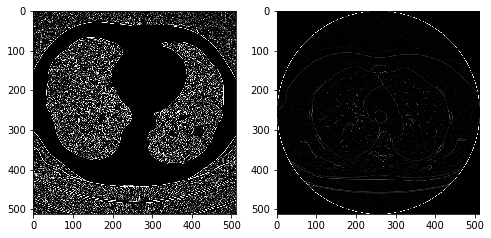

In [9]:
# Apply Find Edge filter

images = [img.filter(ImageFilter.FIND_EDGES), \
          img2.filter(ImageFilter.FIND_EDGES)]

plot_me(images)

#findEdge = rgbimg.filter(ImageFilter.FIND_EDGES)
#imgplot = plt.imshow(findEdge)

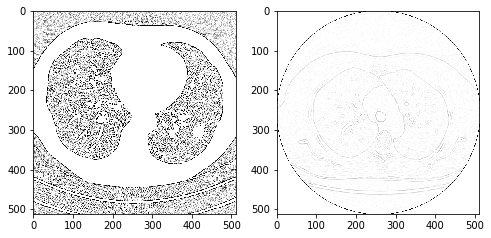

In [10]:
# Apply Contour filter

images = [img.filter(ImageFilter.CONTOUR), \
          img2.filter(ImageFilter.CONTOUR)]

plot_me(images)

#Contour = rgbimg.filter(ImageFilter.CONTOUR)
#imgplot = plt.imshow(Contour)

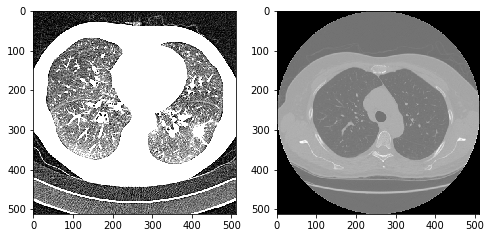

In [11]:
# Apply Detail filter

images = [img.filter(ImageFilter.DETAIL), \
          img2.filter(ImageFilter.DETAIL)]

plot_me(images)

#detail = rgbimg.filter(ImageFilter.DETAIL)
#imgplot = plt.imshow(detail)

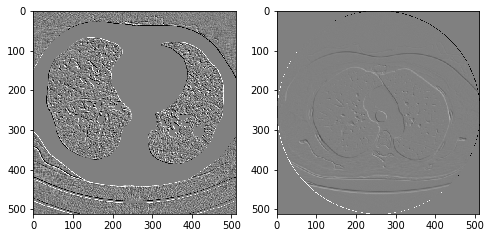

In [12]:
# Apply Emboss filter

images = [img.filter(ImageFilter.EMBOSS), \
          img2.filter(ImageFilter.EMBOSS)]

plot_me(images)

#emboss = rgbimg.filter(ImageFilter.EMBOSS)
#imgplot = plt.imshow(emboss)

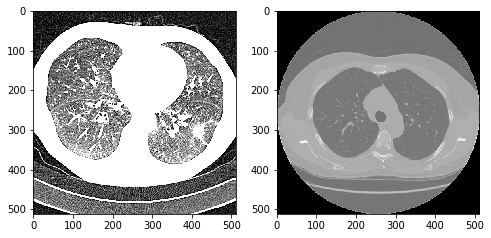

In [13]:
# Apply Sharpen filter

images = [img.filter(ImageFilter.SHARPEN), \
          img2.filter(ImageFilter.SHARPEN)]

plot_me(images)

#sharpen = img.filter(ImageFilter.SHARPEN)
#imgplot = plt.imshow(sharpen)

**Color Scheme**

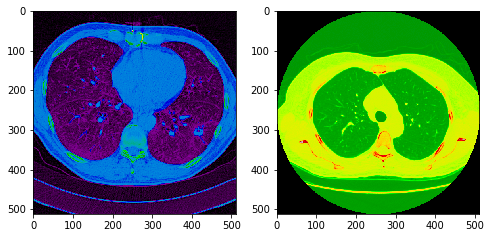

In [14]:
# spectral

fig=plt.figure(figsize=(8, 8))
fig.add_subplot(1, 2, 1)

imgplot = plt.imshow(image)
imgplot.set_cmap('nipy_spectral')

fig.add_subplot(1, 2, 2)
imgplot2 = plt.imshow(image2)
imgplot2.set_cmap('nipy_spectral')

plt.show()
show()

#imgplot = plt.imshow(image)
#imgplot.set_cmap('nipy_spectral')

**Image Normalization**

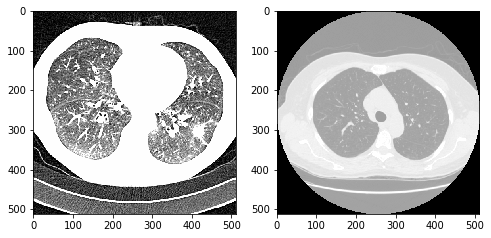

In [15]:
# Autocontrast

images = [ImageOps.autocontrast(img, cutoff = 2, ignore = 2), \
          ImageOps.autocontrast(img2, cutoff = 2, ignore = 2)]

plot_me(images)

#cutoff – How many percent to cut off from the histogram.
#ignore – The background pixel value (use None for no background).
     
# applying autocontrast method  
#im2 = ImageOps.autocontrast(img, cutoff = 2, ignore = 2) 

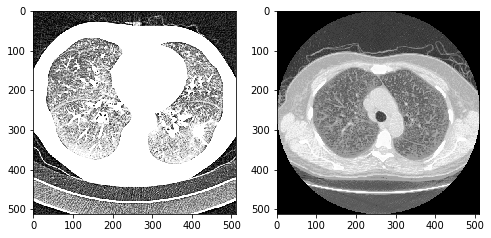

In [16]:
# Equalize

images = [ImageOps.equalize(img, mask=None), \
          ImageOps.equalize(img2, mask=None)]

plot_me(images)

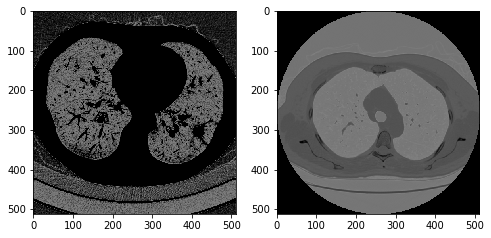

In [17]:
# Solarize

images = [ImageOps.solarize(img, threshold=128), \
          ImageOps.solarize(img2, threshold=128)]

plot_me(images)